In [39]:
# Import the needed packaged 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hddm
import pymc
import scipy
import numpy as np
import os 
from scipy import stats
import scikit_posthocs as sp

In [40]:
# Load concatenated parameter traces of from MCMC for humans 
# os.chdir("Models") 
a = hddm.load_csv('humans_cylinder_buttons_group_traces.csv')
a.drop(columns=['Unnamed: 0'], inplace=True)
a.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
b = hddm.load_csv('humans_cylinder_saccades_group_traces.csv')
b.drop(columns=['Unnamed: 0'], inplace=True)
b.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
c = hddm.load_csv('humans_dots_buttons_group_traces.csv')
c.drop(columns=['Unnamed: 0'], inplace=True)
c.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
d = hddm.load_csv('humans_dots_saccades_group_traces.csv')
d.drop(columns=['Unnamed: 0'], inplace=True)
d.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)

# Some pre-processing 
for mat in [a,b,c,d]:
    mat.rename(columns={'v_stim':'k', 'z_trans':'z'}, inplace=True)
    mat['z'] = pymc.invlogit(mat['z'])

# Put them all in one list
allDatasets = [a, b, c, d]

# Concatenate the data
traces = pd.concat(allDatasets)

# Names of the labelled groups for humans (4 total)
list_of_targets = traces.Paradigm.unique().tolist()

# Names of the dimensions (DDM parameters)
features = list(traces.columns)[0:5]

print(list_of_targets)
print(features)

['humans_cylinder_buttons', 'humans_cylinder_saccades', 'humans_dots_buttons', 'humans_dots_saccades']
['a', 't', 'z', 'v_Intercept', 'k']


In [41]:
traces

,a,t,z,v_Intercept,k,Paradigm
0,1.160387,0.348643,0.464223,0.418398,0.598737,humans_cylinder_buttons
1,1.160028,0.344497,0.466973,0.484129,0.628965,humans_cylinder_buttons
2,1.157290,0.328147,0.472316,-0.047425,0.535667,humans_cylinder_buttons
3,1.147381,0.324819,0.476503,0.382009,0.556357,humans_cylinder_buttons
4,1.190059,0.342103,0.474670,0.129168,0.564847,humans_cylinder_buttons
...,...,...,...,...,...,...
23995,1.637231,0.316135,0.504347,-0.355106,1.216047,humans_dots_saccades
23996,1.798037,0.344239,0.508040,0.065705,1.073735,humans_dots_saccades
23997,1.635325,0.345445,0.498765,-0.257255,1.153567,humans_dots_saccades
23998,1.484316,0.349281,0.515925,-0.193830,1.242944,humans_dots_saccades


In [42]:
# Load concatenated parameter traces of from MCMC for monkeys  
e = hddm.load_csv('m133_cyl_group_traces.csv')
e.drop(columns=['Unnamed: 0'], inplace=True)
e.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
f = hddm.load_csv("m134_cyl_group_traces.csv")
f.drop(columns=['Unnamed: 0'], inplace=True)
f.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
g = hddm.load_csv("m133_RDK_group_traces.csv")
g.drop(columns=['Unnamed: 0'], inplace=True)
g.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)
h = hddm.load_csv("m134_RDK_group_traces.csv")
h.drop(columns=['Unnamed: 0'], inplace=True)
h.drop(columns=["a_std", "t_std", "z_std", "v_Intercept_std", "v_stim_std"], inplace=True)

# Pre-processing 
for mat in [e,f,g,h]:
    mat.rename(columns={'v_stim':'k', 'z_trans':'z'}, inplace=True)
    mat['z'] = pymc.invlogit(mat['z'])

# Put them all in one list
allDatasets_monkeys = [e, f, g, h]

# Concatenate the data
traces_monkeys = pd.concat(allDatasets_monkeys)

# Names of the labelled groups for monkeys (again 4 total)
list_of_targets_m = traces_monkeys.Paradigm.unique().tolist()

# Just to showcase the data structure
print(traces_monkeys)

              a         t         z  v_Intercept         k  Paradigm
0      0.583305  0.183017  0.494340     0.253402  2.799782  m133_cyl
1      0.590216  0.183018  0.494512     0.217006  2.691675  m133_cyl
2      0.582067  0.182913  0.492228     0.330535  2.676870  m133_cyl
3      0.562810  0.182804  0.501833     0.359212  2.696833  m133_cyl
4      0.582163  0.182929  0.501086     0.147656  2.666845  m133_cyl
...         ...       ...       ...          ...       ...       ...
23995  1.156764  0.396742  0.498593    -0.032005  1.455229  m134_RDK
23996  1.231567  0.403389  0.518875    -0.010952  1.248217  m134_RDK
23997  1.182754  0.389716  0.532040    -0.162907  1.359792  m134_RDK
23998  1.199234  0.389511  0.540464    -0.154918  1.472589  m134_RDK
23999  1.223406  0.400870  0.550037    -0.009266  1.434058  m134_RDK

[96000 rows x 6 columns]


In [43]:
# traces
stats.friedmanchisquare(a.iloc[:, 0:4], b.iloc[:, 0:4], c.iloc[:, 0:4], d.iloc[:, 0:4])

FriedmanchisquareResult(statistic=94042368719.91055, pvalue=0.0)

In [44]:
# traces
stats.friedmanchisquare(e.iloc[:, 0:4], f.iloc[:, 0:4], g.iloc[:, 0:4], h.iloc[:, 0:4])

FriedmanchisquareResult(statistic=95347197746.43205, pvalue=0.0)

In [45]:
combined_df_a_h = pd.DataFrame({'CB': a.iloc[0:1000, 0], 'CS': b.iloc[0:1000, 0], 'DB': c.iloc[0:1000, 0], 'DS': d.iloc[0:1000, 0]})
combined_df_t_h = pd.DataFrame({'CB': a.iloc[0:1000, 1], 'CS': b.iloc[0:1000, 1], 'DB': c.iloc[0:1000, 1], 'DS': d.iloc[0:1000, 1]})
combined_df_z_h = pd.DataFrame({'CB': a.iloc[0:1000, 2], 'CS': b.iloc[0:1000, 2], 'DB': c.iloc[0:1000, 2], 'DS': d.iloc[0:1000, 2]})
combined_df_v0_h = pd.DataFrame({'CB': a.iloc[0:1000, 3], 'CS': b.iloc[0:1000, 3], 'DB': c.iloc[0:1000, 3], 'DS': d.iloc[0:1000, 3]})
combined_df_k_h = pd.DataFrame({'CB': a.iloc[0:1000, 4], 'CS': b.iloc[0:1000, 4], 'DB': c.iloc[0:1000, 4], 'DS': d.iloc[0:1000, 4]})

In [46]:
combined_df_a_m = pd.DataFrame({'m133_C': e.iloc[0:1000, 0], 'm134_C': f.iloc[0:1000, 0], 'm133_D': g.iloc[0:1000, 0], 'm134_D': h.iloc[0:1000, 0]})
combined_df_t_m = pd.DataFrame({'m133_C': e.iloc[0:1000, 1], 'm134_C': f.iloc[0:1000, 1], 'm133_D': g.iloc[0:1000, 1], 'm134_D': h.iloc[0:1000, 1]})
combined_df_z_m = pd.DataFrame({'m133_C': e.iloc[0:1000, 2], 'm134_C': f.iloc[0:1000, 2], 'm133_D': g.iloc[0:1000, 2], 'm134_D': h.iloc[0:1000, 2]})
combined_df_v0_m = pd.DataFrame({'m133_C': e.iloc[0:1000, 3], 'm134_C': f.iloc[0:1000, 3], 'm133_D': g.iloc[0:1000, 3], 'm134_D': h.iloc[0:1000, 3]})
combined_df_k_m = pd.DataFrame({'m133_C': e.iloc[0:1000, 4], 'm134_C': f.iloc[0:1000, 4], 'm133_D': g.iloc[0:1000, 4], 'm134_D': h.iloc[0:1000, 4]})

In [47]:
sp.posthoc_nemenyi_friedman(combined_df_a_h)

,CB,CS,DB,DS
CB,1.000000,0.896267,0.001,0.001
CS,0.896267,1.000000,0.001,0.001
DB,0.001000,0.001000,1.000,0.001
DS,0.001000,0.001000,0.001,1.000


In [48]:
sp.posthoc_nemenyi_friedman(combined_df_t_h)

,CB,CS,DB,DS
CB,1.000,0.001,0.001000,0.001000
CS,0.001,1.000,0.001000,0.001000
DB,0.001,0.001,1.000000,0.093185
DS,0.001,0.001,0.093185,1.000000


In [49]:
sp.posthoc_nemenyi_friedman(combined_df_z_h)

,CB,CS,DB,DS
CB,1.000,0.001000,0.001000,0.001
CS,0.001,1.000000,0.445243,0.001
DB,0.001,0.445243,1.000000,0.001
DS,0.001,0.001000,0.001000,1.000


In [50]:
sp.posthoc_nemenyi_friedman(combined_df_v0_h)

,CB,CS,DB,DS
CB,1.000000,0.896267,0.001000,0.001000
CS,0.896267,1.000000,0.001000,0.001000
DB,0.001000,0.001000,1.000000,0.025834
DS,0.001000,0.001000,0.025834,1.000000


In [51]:
sp.posthoc_nemenyi_friedman(combined_df_k_h)

,CB,CS,DB,DS
CB,1.000000,0.138086,0.001000,0.001000
CS,0.138086,1.000000,0.001000,0.001000
DB,0.001000,0.001000,1.000000,0.109694
DS,0.001000,0.001000,0.109694,1.000000


In [52]:
sp.posthoc_nemenyi_friedman(combined_df_a_m)

,m133_C,m134_C,m133_D,m134_D
m133_C,1.000,0.001,0.001,0.001
m134_C,0.001,1.000,0.001,0.001
m133_D,0.001,0.001,1.000,0.001
m134_D,0.001,0.001,0.001,1.000


In [53]:
sp.posthoc_nemenyi_friedman(combined_df_t_m)

,m133_C,m134_C,m133_D,m134_D
m133_C,1.000,0.001,0.001,0.001
m134_C,0.001,1.000,0.001,0.001
m133_D,0.001,0.001,1.000,0.001
m134_D,0.001,0.001,0.001,1.000


In [54]:
sp.posthoc_nemenyi_friedman(combined_df_z_m)

,m133_C,m134_C,m133_D,m134_D
m133_C,1.000,0.001,0.001,0.001
m134_C,0.001,1.000,0.001,0.001
m133_D,0.001,0.001,1.000,0.001
m134_D,0.001,0.001,0.001,1.000


In [55]:
sp.posthoc_nemenyi_friedman(combined_df_v0_m)

,m133_C,m134_C,m133_D,m134_D
m133_C,1.000,0.001,0.001,0.001
m134_C,0.001,1.000,0.001,0.001
m133_D,0.001,0.001,1.000,0.001
m134_D,0.001,0.001,0.001,1.000


In [56]:
sp.posthoc_nemenyi_friedman(combined_df_k_m)

,m133_C,m134_C,m133_D,m134_D
m133_C,1.000,0.900,0.001,0.001
m134_C,0.900,1.000,0.001,0.001
m133_D,0.001,0.001,1.000,0.001
m134_D,0.001,0.001,0.001,1.000


In [57]:
# Normalise all data before feeding them into the LDA 

# Separating out the features
x_old_h = traces.loc[:, features].values
x_old_m = traces_monkeys.loc[:, features].values

# Standardizing the features
x_h = StandardScaler().fit_transform(x_old_h)
x_m = StandardScaler().fit_transform(x_old_m)

print(x_m)

[[-0.9380725  -0.85739185 -0.68301624  0.89994559  1.04844955]
 [-0.92013091 -0.85738568 -0.68146893  0.81788064  0.89892819]
 [-0.94128498 -0.8586     -0.70197018  1.07385964  0.87845077]
 ...
 [ 0.61804352  1.54453739 -0.34456425 -0.0387221  -0.94318878]
 [ 0.66082446  1.54214676 -0.2689344  -0.02071023 -0.78718101]
 [ 0.72357186  1.67414568 -0.1829927   0.30769785 -0.84047204]]


In [58]:
# Create LDA with the human data for projecting monkey data onto it 
model = LinearDiscriminantAnalysis()
LDs = model.fit_transform(x_h, traces["Paradigm"])
print(LDs)

[[-5.11512328 -1.65398999  1.56008569]
 [-4.85916928 -1.51071435  1.24537726]
 [-5.26696784 -0.53871317  0.74050273]
 ...
 [ 6.11002291  1.26812609  1.18835557]
 [ 6.56180686  0.48346067 -0.61545167]
 [ 5.5689802   0.16145047  2.82550061]]


In [59]:
# Obtain the loading scores 
pd.DataFrame(model.coef_[1, :]).abs()/pd.DataFrame(model.coef_[1, :]).abs().sum()*100

,0
0,16.209204
1,8.658492
2,0.426584
3,6.117614
4,68.588107


In [60]:
# Extract the first two LDs and assign correct labels 

principalDf = pd.DataFrame(LDs[:, 0:2], columns = ['LD1', 'LD2'])
long_paradigm_list = traces[['Paradigm']]["Paradigm"]
newlong_paradigm_list=long_paradigm_list.reset_index()
newlong_paradigm_list.drop(columns="index", inplace=True)
finalDf = pd.concat([principalDf, newlong_paradigm_list], axis=1)
print(finalDf)

            LD1       LD2                 Paradigm
0     -5.115123 -1.653990  humans_cylinder_buttons
1     -4.859169 -1.510714  humans_cylinder_buttons
2     -5.266968 -0.538713  humans_cylinder_buttons
3     -5.833992 -0.364180  humans_cylinder_buttons
4     -4.879822 -0.730582  humans_cylinder_buttons
...         ...       ...                      ...
95995  6.871761  2.206112     humans_dots_saccades
95996  5.340887  3.126861     humans_dots_saccades
95997  6.110023  1.268126     humans_dots_saccades
95998  6.561807  0.483461     humans_dots_saccades
95999  5.568980  0.161450     humans_dots_saccades

[96000 rows x 3 columns]


In [61]:
# Transform the monkey data using the created model 

X_new_ld = model.transform(x_m)
principalDf_m = pd.DataFrame(X_new_ld[:, 0:2], columns = ['LD1', 'LD2'])
long_paradigm_list_m = traces_monkeys[['Paradigm']]["Paradigm"]
newlong_paradigm_list_m = long_paradigm_list_m.reset_index()
newlong_paradigm_list_m.drop(columns="index", inplace=True)
finalDf_m = pd.concat([principalDf_m, newlong_paradigm_list_m], axis=1)

In [62]:
# For plotting, remove the 99th and 1st percentile to better showcase the clouds 

# Make a copy 
corrected_df_h = finalDf

total_new = []
a = pd.Series
h_total = pd.DataFrame
for target in list_of_targets:
    quantile_99_ld1 = corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD1"].quantile(0.999)
    quantile_01_ld1 = corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD1"].quantile(0.001)
    series_ld1 = (corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD1"] < quantile_99_ld1) | (corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD1"] > quantile_01_ld1)
    
    quantile_99_ld2 = corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD2"].quantile(0.999)
    quantile_01_ld2 = corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD2"].quantile(0.001)
    series_ld2 = (corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD2"] < quantile_99_ld2) | (corrected_df_h[corrected_df_h["Paradigm"] == target].loc[:, "LD2"] > quantile_01_ld2)
    
    # Double_index has the full number of values 
    double_index = pd.concat([series_ld1, series_ld2], axis=1)
    place_holder = corrected_df_h.loc[corrected_df_h["Paradigm"] == target, ["LD1", "LD2"]]
    a = place_holder.loc[(double_index.loc[:, "LD1"] == True) & (double_index.loc[:, "LD2"] == True), ["LD1", "LD2"]]
    
    a = pd.DataFrame(a).reset_index(drop=True)
    a["Paradigm"] = target
    total_new.append(a)

# Create a new table for the humans with outliers removed (essentially just finalDf with fewer rows)
total_idexer = pd.concat(total_new)

print(total_idexer)

            LD1       LD2                 Paradigm
0     -5.115123 -1.653990  humans_cylinder_buttons
1     -4.859169 -1.510714  humans_cylinder_buttons
2     -5.266968 -0.538713  humans_cylinder_buttons
3     -5.833992 -0.364180  humans_cylinder_buttons
4     -4.879822 -0.730582  humans_cylinder_buttons
...         ...       ...                      ...
23995  6.871761  2.206112     humans_dots_saccades
23996  5.340887  3.126861     humans_dots_saccades
23997  6.110023  1.268126     humans_dots_saccades
23998  6.561807  0.483461     humans_dots_saccades
23999  5.568980  0.161450     humans_dots_saccades

[96000 rows x 3 columns]


In [63]:
# For monkeys 
corrected_df_m = finalDf_m.copy()

total_new_m = []
b = pd.Series
m_total = pd.DataFrame
for target in list_of_targets_m:
    quantile_99_ld1_m = corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD1"].quantile(0.999)
    quantile_01_ld1_m = corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD1"].quantile(0.001)
    series_ld1_m = (corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD1"] < quantile_99_ld1_m) & (corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD1"] > quantile_01_ld1_m)
    
    quantile_99_ld2_m = corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD2"].quantile(0.999)
    quantile_01_ld2_m = corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD2"].quantile(0.001)
    series_ld2_m = (corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD2"] < quantile_99_ld2_m) & (corrected_df_m[corrected_df_m["Paradigm"] == target].loc[:, "LD2"] > quantile_01_ld2_m)
    
    # Double_index has the full number of values 
    double_index_m = pd.concat([series_ld1_m, series_ld2_m], axis=1)
    place_holder_m = corrected_df_m.loc[corrected_df_m["Paradigm"] == target, ["LD1", "LD2"]]
    b = place_holder_m.loc[(double_index_m.loc[:, "LD1"] == True) & (double_index_m.loc[:, "LD2"] == True), ["LD1", "LD2"]]
    
    b = pd.DataFrame(b).reset_index(drop=True)
    b["Paradigm"] = target
    total_new_m.append(b)
total_idexer_m = pd.concat(total_new_m)

In [64]:
total_idexer_NI = total_idexer.reset_index()
total_idexer_NI = total_idexer_NI.drop(columns="index")
data1 = total_idexer_NI.iloc[::]

In [65]:
total_idexer_NI_m = total_idexer_m.reset_index()
total_idexer_NI_m = total_idexer_NI_m.drop(columns="index")
data2 = total_idexer_NI_m.iloc[::]

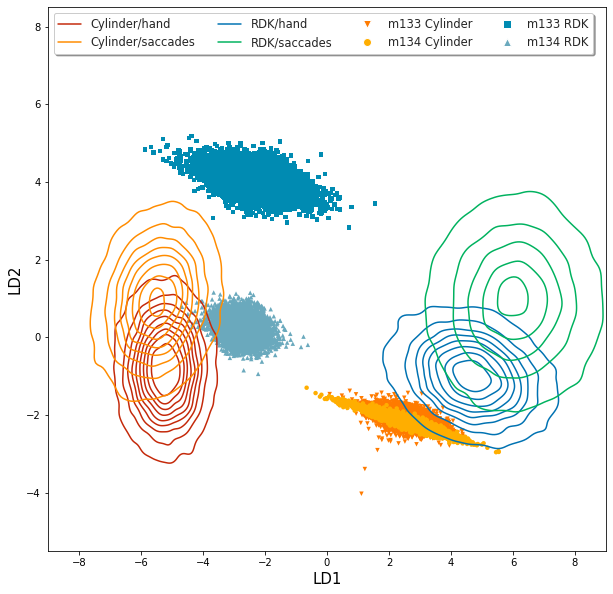

In [66]:
# New figure with contours for humans and scatter for monkeys 
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style("whitegrid")
colors = ["#c4290a", "#FF8C00", "#0072B2", "#00b25f"]
colors_m = ["#ff7b00", "#ffae00", "#008bb2", "#6aa9bd"]

sns.kdeplot(data=data1, x="LD1", y="LD2", hue="Paradigm", palette=colors, alpha=1)
marker_list = ['v', 'o', 's', '^']    
    
cc = 0
for target in list_of_targets_m:
    data = finalDf_m[finalDf_m["Paradigm"] == target]
    plt.scatter(data['LD1'], data['LD2'], s=20, marker=marker_list[cc], edgecolors='none', color=colors_m[cc])
    cc += 1

ax.set_ylim(-5.5, 8.5)
ax.set_xlim(-9, 9)

kde_legend_lines = [plt.Line2D([0], [0], color=colors[i]) for i in range(4)]
scatter_legend_markers = [plt.Line2D([0], [0], marker=marker_list[i], color='w', label=target, markersize=8, markerfacecolor=colors_m[i]) for i, target in enumerate(list_of_targets_m)]
H3 = kde_legend_lines + scatter_legend_markers
lgnd1 = ax.legend(handles=H3, labels=["Cylinder/hand", "Cylinder/saccades", "RDK/hand", "RDK/saccades", "m133 Cylinder", "m134 Cylinder","m133 RDK", "m134 RDK"], loc='upper left', ncol=4, fancybox=True, shadow=True, fontsize=11.5)
# lgnd1 = ax.legend(handles=H3, labels=["Cylinder/hand", "Cylinder/saccades", "RDK/hand", "RDK/saccades"], loc='upper left', ncol=2, fancybox=True, shadow=True, fontsize=13.5)


ax.set_xlabel("LD1", fontsize=15)
ax.set_ylabel("LD2", fontsize=15)
fig.savefig("human_monkey_LDA_v2.svg")
fig.show()

In [67]:
# Hypothesis testing along LD1 
traces_copy = traces.copy()

traces_copy.loc[(traces_copy["Paradigm"] == "humans_cylinder_buttons") | (traces_copy["Paradigm"] == "humans_cylinder_saccades"), "Paradigm"] = "Cylinder"
traces_copy.loc[traces_copy["Paradigm"] != "Cylinder", "Paradigm"] = "RDK"
list_of_targets_hypothesis = traces_copy.Paradigm.unique().tolist()

model_h_hypothesis = LinearDiscriminantAnalysis()
LDs_h_hypothesis = model_h_hypothesis.fit_transform(x_h, traces_copy["Paradigm"])

principalDf_hh = pd.DataFrame(LDs_h_hypothesis[:, 0:1], columns = ['LD1'])
long_paradigm_list_hypothesis_h = traces_copy[['Paradigm']]["Paradigm"]
newlong_paradigm_list_hh=long_paradigm_list_hypothesis_h.reset_index()
newlong_paradigm_list_hh.drop(columns="index", inplace=True)
finalDf_hh = pd.concat([principalDf_hh, newlong_paradigm_list_hh], axis=1)
finalDf_hh

,LD1,Paradigm
0,-4.791824,Cylinder
1,-4.519150,Cylinder
2,-4.946676,Cylinder
3,-5.488073,Cylinder
4,-4.682412,Cylinder
...,...,...
95995,6.134288,RDK
95996,3.977573,RDK
95997,5.289307,RDK
95998,6.135476,RDK


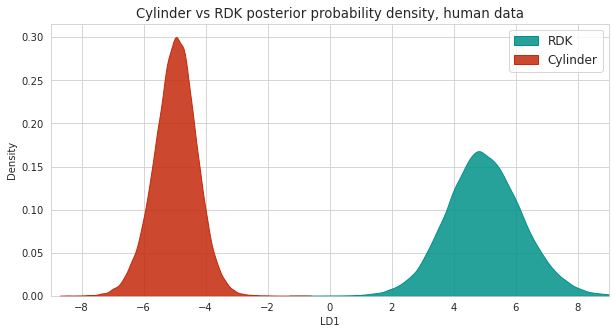

In [68]:
fig, ax = plt.subplots(figsize = (10,5))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
colours = {"RDK": "#009289", "Cylinder": "#C4290A"}
sns.kdeplot(data=finalDf_hh,x="LD1", fill=True, hue="Paradigm", alpha=0.85, palette=colours).set(title="Cylinder vs RDK posterior probability density, human data")
ax.legend(["RDK", "Cylinder"])
ax.set_xlim(-9, 9)
fig.savefig("humans_LD1_densities_stimuli.svg")

In [69]:
# Hypothesis testing along LD1 for mode of response 
traces_copy2 = traces
traces_copy2.loc[(traces["Paradigm"] == "humans_cylinder_buttons") | (traces["Paradigm"] == "humans_dots_buttons"), "Paradigm"] = "buttons"
traces_copy2.loc[traces["Paradigm"] != "buttons", "Paradigm"] = "saccades"
list_of_targets_hypothesis2 = traces_copy2.Paradigm.unique().tolist()

model_h_hypothesis2 = LinearDiscriminantAnalysis()
LDs_h_hypothesis2 = model_h_hypothesis2.fit_transform(x_h, traces_copy2["Paradigm"])
# print(traces)
principalDf_hh2 = pd.DataFrame(LDs_h_hypothesis2[:, 0:1], columns = ['LD1'])
long_paradigm_list_hypothesis_h2 = traces_copy2[['Paradigm']]["Paradigm"]
newlong_paradigm_list_hh2=long_paradigm_list_hypothesis_h2.reset_index()
newlong_paradigm_list_hh2.drop(columns="index", inplace=True)
finalDf_hh2 = pd.concat([principalDf_hh2, newlong_paradigm_list_hh2], axis=1)
finalDf_hh2

,LD1,Paradigm
0,-1.825745,buttons
1,-1.661312,buttons
2,-0.672539,buttons
3,-0.505771,buttons
4,-0.894470,buttons
...,...,...
95995,2.342907,saccades
95996,3.046883,saccades
95997,1.311041,saccades
95998,0.634224,saccades


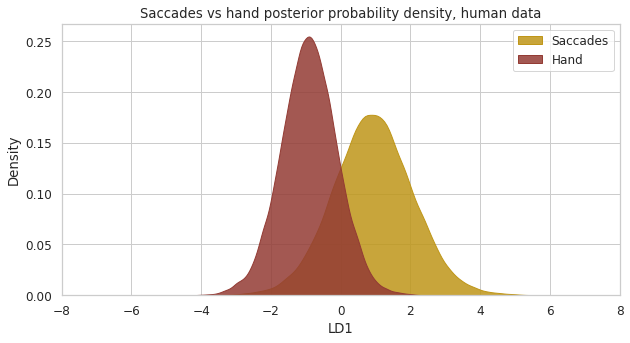

In [70]:
fig, ax = plt.subplots(figsize = (10,5))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
colours = {"saccades": "#BF9618", "buttons": "#933B34"}
sns.kdeplot(data=finalDf_hh2,x="LD1", fill=True, hue="Paradigm", alpha=0.85, palette=colours).set(title="Saccades vs hand posterior probability density, human data")
ax.legend(["Saccades", "Hand"])
ax.set_xlim(-8, 8)
fig.savefig("humans_LD1_densities_response.svg")

<function matplotlib.pyplot.show(close=None, block=None)>

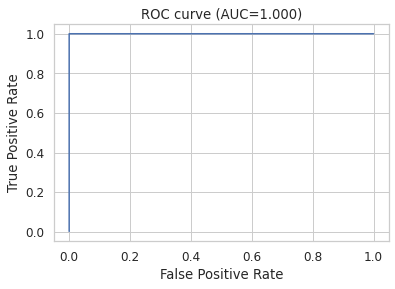

In [71]:
# minimal_criterion = finalDf_hh["LD1"].min()
minimal_criterion = -9
# maximal_criterion = finalDf_hh["LD1"].max()
maximal_criterion = 9
criterion_list = np.linspace(minimal_criterion, maximal_criterion, 25)

RDK_only = finalDf_hh.loc[finalDf_hh["Paradigm"] == "RDK", "LD1"]
Cyl_only = finalDf_hh.loc[finalDf_hh["Paradigm"] == "Cylinder", "LD1"]
total_signal = len(RDK_only)
total_non_signal = len(Cyl_only)

hit_list = []
FP_list = []
for criterion in criterion_list:

    hits_states = [RDK_only>criterion]
    hits_num = len(np.where(hits_states)[0])
    hits_proportion = hits_num/total_non_signal 
    hit_list.append(hits_proportion)
    
    false_positive_states = [Cyl_only>criterion]
    false_positives_num = len(np.where(false_positive_states)[0])
    false_positives_proportion = false_positives_num/total_non_signal 
    FP_list.append(false_positives_proportion)
    
fig2 = plt.figure()
plt.plot(FP_list, hit_list)
auc=np.trapz(hit_list, FP_list)
plt.title(f"ROC curve (AUC={np.abs(auc):.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

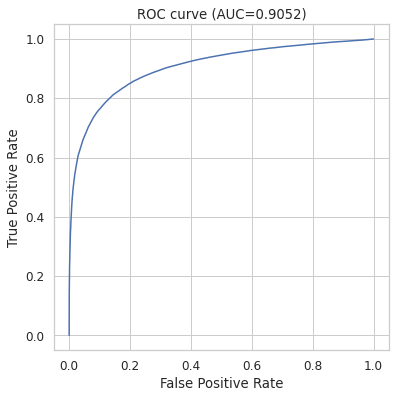

In [72]:
minimal_criterion = -6
maximal_criterion = 6
criterion_list = np.linspace(minimal_criterion, maximal_criterion, 8000)

saccades_only = finalDf_hh2.loc[finalDf_hh2["Paradigm"] == "saccades", "LD1"]
buttons_only = finalDf_hh2.loc[finalDf_hh2["Paradigm"] == "buttons", "LD1"]
total_signal = len(saccades_only)
total_non_signal = len(buttons_only)

hit_list = []
FP_list = []
for criterion in criterion_list:

    hits_states = [saccades_only>criterion]
    hits_num = len(np.where(hits_states)[0])
    hits_proportion = hits_num/total_non_signal 
    hit_list.append(hits_proportion)
    
    false_positive_states = [buttons_only>criterion]
    false_positives_num = len(np.where(false_positive_states)[0])
    false_positives_proportion = false_positives_num/total_non_signal 
    FP_list.append(false_positives_proportion)
    
fig2 = plt.figure(figsize = (6,6))
plt.plot(FP_list, hit_list)
auc=np.trapz(hit_list, FP_list)
plt.title(f"ROC curve (AUC={np.abs(auc):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show

In [84]:
stats.mannwhitneyu(finalDf_hh.loc[finalDf_hh.Paradigm == "Cylinder"].LD1[0:1000], finalDf_hh.loc[finalDf_hh.Paradigm != "Cylinder"].LD1[0:1000])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [85]:
stats.mannwhitneyu(finalDf_hh2.loc[finalDf_hh2.Paradigm == "saccades"].LD1[0:1000], finalDf_hh2.loc[finalDf_hh2.Paradigm != "saccades"].LD1[0:1000])

MannwhitneyuResult(statistic=899460.0, pvalue=4.1359917516309924e-210)